<a href="https://colab.research.google.com/github/gs3257/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelters = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [9]:
shelters.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [0]:
shelters = shelters[shelters['Report Date'] == '09/30/2019']

In [11]:
shelters

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
shelters = shelters.drop_duplicates()

In [13]:
shelters

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [14]:
shelters.columns

Index(['Report Date', 'Borough', 'Community District',
       'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter',
       'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel',
       'FWC Shelter'],
      dtype='object')

In [0]:
shelters = shelters.fillna(0)

In [0]:
shelters['total_sum'] = shelters['Adult Family Comm Hotel'] + shelters['Adult Family Shelter'] + shelters['Adult Shelter'] + shelters['Adult Shelter Comm Hotel'] + shelters['FWC Cluster'] + shelters['FWC Comm Hotel'] + shelters['FWC Shelter']

In [44]:
shelters

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total Sum,total sum,total,total_sum
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0,15.0,15.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0,8.0,8.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0,23.0,23.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0,32.0,32.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0,21.0,21.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0,26.0,26.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0,13.0,13.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0,8.0,8.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0


In [0]:
complaints = df[df.complaint_type == 'Homeless Person Assistance']

In [0]:
complaints_cd = complaints.groupby('borocd').size().reset_index(name='count_requests')

In [49]:
merged_cd = pd.merge(how='left', left=complaints_cd, right=shelters, left_on='borocd', right_on='Community District')
merged_cd.head()

,borocd,count_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total Sum,total sum,total,total_sum
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,102.0,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0,17.0,17.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0,8.0,8.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0,10.0,10.0,10.0


In [50]:
merged_cd = merged_cd.fillna(0)
merged_cd.head()

,borocd,count_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total Sum,total sum,total,total_sum
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,102.0,965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0,17.0,17.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0,8.0,8.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0,10.0,10.0,10.0


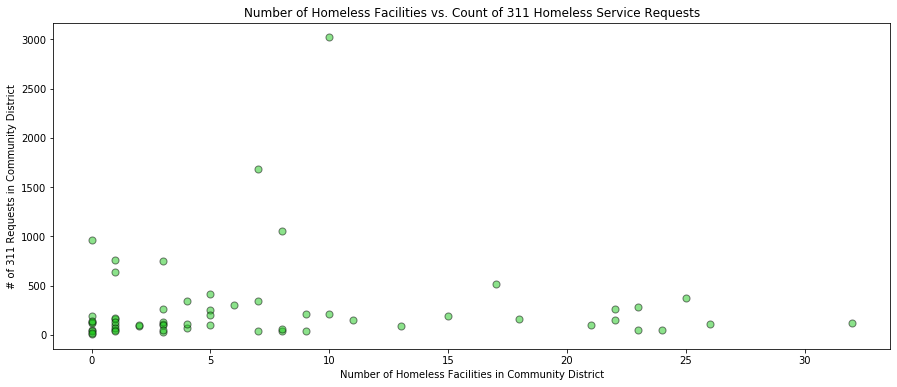

In [52]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_cd.total_sum), 
    np.array(merged_cd.count_requests), 
    s=50, 
    c='#1BC618', 
    edgecolors='black', 
    alpha=0.5) 

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

In [53]:
np.corrcoef(merged_cd.total_sum, merged_cd.count_requests)


array([[1.        , 0.01073618],
       [0.01073618, 1.        ]])

In [54]:
y = merged_cd.count_requests
x = merged_cd.total_sum
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

    const  total_sum
0     1.0        1.0
1     1.0        0.0
2     1.0       17.0
3     1.0        8.0
4     1.0       10.0
5     1.0        3.0
6     1.0        7.0
7     1.0        1.0
8     1.0        6.0
9     1.0       23.0
10    1.0       25.0
11    1.0        3.0
12    1.0       15.0
13    1.0        8.0
14    1.0       23.0
15    1.0       32.0
16    1.0       21.0
17    1.0       26.0
18    1.0       13.0
19    1.0        1.0
20    1.0        8.0
21    1.0        3.0
22    1.0        0.0
23    1.0        4.0
24    1.0        7.0
25    1.0        5.0
26    1.0       22.0
27    1.0       10.0
28    1.0       18.0
29    1.0        4.0
30    1.0        9.0
31    1.0       11.0
32    1.0        2.0
33    1.0        0.0
34    1.0        0.0
35    1.0        2.0
36    1.0        1.0
37    1.0        1.0
38    1.0        1.0
39    1.0       24.0
40    1.0        4.0
41    1.0        3.0
42    1.0        5.0
43    1.0        5.0
44    1.0        5.0
45    1.0        3.0
46    1.0    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: const        274.477175
total_sum      0.599210
dtype: float64
R2: 0.00011526563489161479


In [56]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 0.6x + 274.48; R2 = 0.0


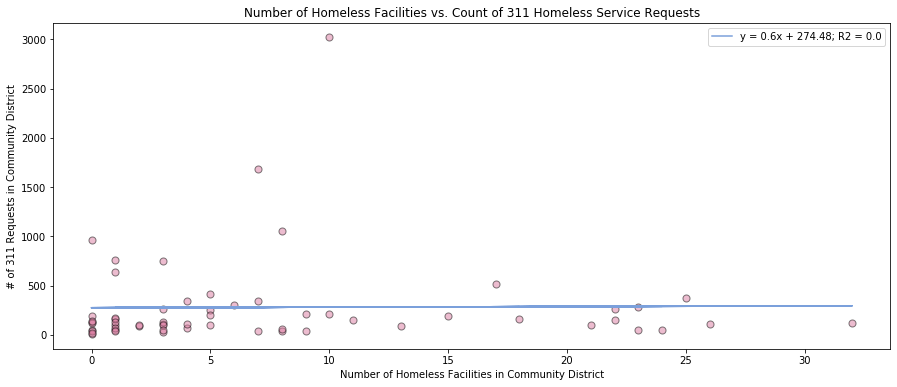

In [57]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_cd.total_sum), 
    np.array(merged_cd.count_requests), 
    s=50, 
    c='#db7ba0', 
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    np.array(merged_cd.total_sum), 
    model.params[0] +  model.params[1]*np.array(merged_cd.total_sum),
    c='#7ba0db',
    label=label)

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

The concentration of homeless shelters does not seem to influence the frequency of 311 requests related to homeless services. There is a very low positive correlation (0.01073618) but the relationship between the two is not well defined.